In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data_frame = pd.read_csv('digikala-orders.csv')
data_frame.head(20)

,ID_Order,ID_Customer,ID_Item,DateTime_CartFinalize,Amount_Gross_Order,city_name_fa,Quantity_item
0,2714054,469662,21386,2015-10-15 08:50:56.000,597982.0,محمود آباد,1.0
1,11104039,3063877,248497,2018-02-11 00:29:26.000,980000.0,خرمدره,1.0
2,4228130,3184893,50144,2016-06-14 00:30:08.000,229358.0,قرچک,1.0
3,22225624,6888562,70208,2018-09-03 14:37:19.000,16514.0,قم,1.0
4,4068771,2533490,67627,2016-05-21 11:51:02.000,133028.0,تهران,1.0
5,11479246,2841640,312932,2018-03-01 12:07:15.000,290000.0,مشهد,1.0
6,8267421,5235886,42365,2017-08-19 13:30:24.000,55046.0,اصفهان,1.0
7,11588978,5574955,715680,2018-03-04 19:19:02.000,2790000.0,رشت,1.0
8,9916301,1145709,102588,2017-12-11 19:33:59.000,34862.0,تهران,1.0
9,10740652,4928230,658519,2018-01-23 06:11:34.000,2600000.0,خرمشهر,1.0


In [3]:
data_frame['DateTime_CartFinalize'] = pd.to_datetime(data_frame['DateTime_CartFinalize'])
data_frame['YearMonth'] = data_frame['DateTime_CartFinalize'].map(lambda date : 100 * date.year + date.month)

In [4]:
data_Quantity_item = data_frame.groupby(['YearMonth'])['Quantity_item'].sum().reset_index()
data_Quantity_item.head()

,YearMonth,Quantity_item
0,201309,7.0
1,201310,77.0
2,201311,104.0
3,201312,125.0
4,201401,156.0


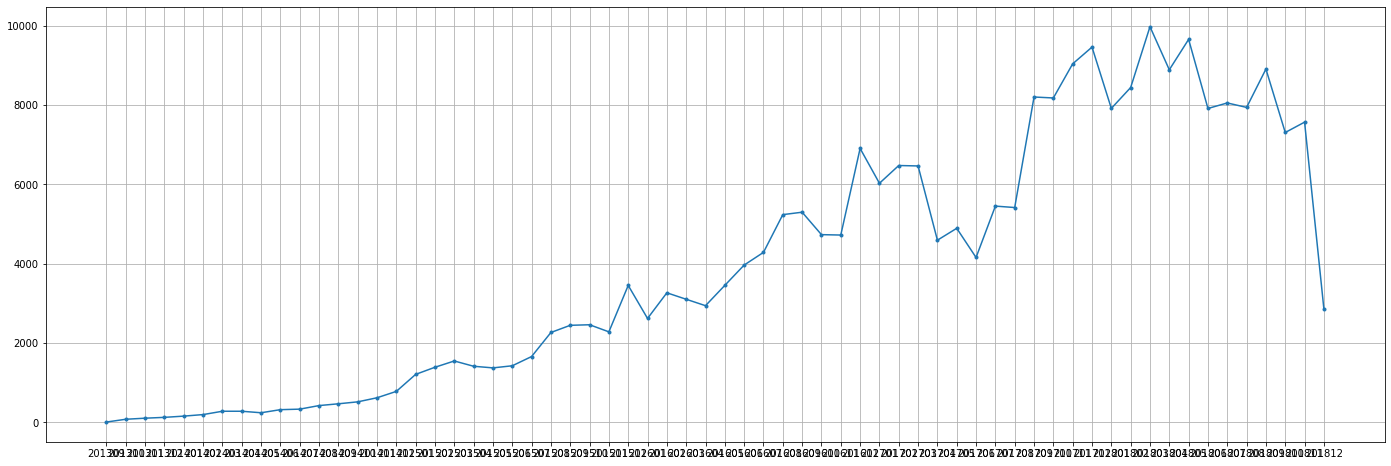

In [5]:
plt.figure(figsize = (24, 8))
plt.plot(data_Quantity_item['YearMonth'].to_numpy(dtype = str), data_Quantity_item['Quantity_item'], marker = '.')
plt.grid()

In [7]:
data_city_name = data_frame.groupby('city_name_fa')['ID_Customer'].nunique().reset_index()
data_city_name

,city_name_fa,ID_Customer
0,آب بر,14
1,آبادان,320
2,آباده,48
3,آباده طشک,3
4,آبدان,2
...,...,...
901,گیوی,10
902,یاسوج,229
903,یاسوکند,1
904,یامچی,1


In [8]:
data_city_name['Percent_City_Customers_to_AllCustomers'] = data_city_name['ID_Customer'] / data_city_name['ID_Customer'].sum()
data_city_name

,city_name_fa,ID_Customer,Percent_City_Customers_to_AllCustomers
0,آب بر,14,0.000091
1,آبادان,320,0.002082
2,آباده,48,0.000312
3,آباده طشک,3,0.000020
4,آبدان,2,0.000013
...,...,...,...
901,گیوی,10,0.000065
902,یاسوج,229,0.001490
903,یاسوکند,1,0.000007
904,یامچی,1,0.000007


In [9]:
sorted_data_city_name = data_city_name.sort_values(by=['ID_Customer'], ascending=False)
top_city_costumers = sorted_data_city_name.head(8)
top_city_costumers

,city_name_fa,ID_Customer,Percent_City_Customers_to_AllCustomers
215,تهران,81048,0.527282
815,کرج,4758,0.030955
654,مشهد,4674,0.030408
76,اصفهان,4664,0.030343
97,اهواز,3353,0.021814
505,شیراز,3076,0.020012
355,رشت,2414,0.015705
202,تبریز,2075,0.013500


In [10]:
Other_Percent_City_Customers = sorted_data_city_name.tail(sorted_data_city_name.shape[0] - 8)['Percent_City_Customers_to_AllCustomers'].sum()
new_row = {'city_name_fa':'Other', 'ID_Customer':'None', 'Percent_City_Customers_to_AllCustomers':Other_Percent_City_Customers}
top_city_costumers = top_city_costumers.append(new_row, ignore_index=True)
top_city_costumers

,city_name_fa,ID_Customer,Percent_City_Customers_to_AllCustomers
0,تهران,81048,0.527282
1,کرج,4758,0.030955
2,مشهد,4674,0.030408
3,اصفهان,4664,0.030343
4,اهواز,3353,0.021814
5,شیراز,3076,0.020012
6,رشت,2414,0.015705
7,تبریز,2075,0.013500
8,Other,None,0.309982


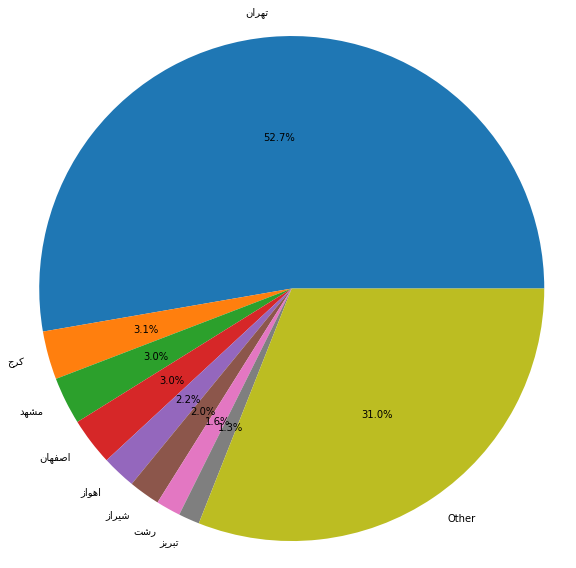

In [11]:
from bidi.algorithm import get_display
from arabic_reshaper import reshape

labels = top_city_costumers['city_name_fa']
labels = [get_display(reshape(label)) for label in labels]
data = top_city_costumers['Percent_City_Customers_to_AllCustomers']

fig1, ax1 = plt.subplots(figsize =(10, 10))
ax1.pie(data, labels=labels, autopct='%1.1f%%')
ax1.axis('equal')

plt.show()